# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Data](#5.4_Load_Data)
  * [5.5 Prepare Data](#5.5_Prepare_Data)
      * [5.5.1 Encoding Categorical](#5.5.1_Encoding_catgorical)
  * [5.6 Splitting Data](#5.6_Splitting_Data)
  * [5.7 Training Models](#5.7_Training_Models)
     * [5.7.1 Decision Tree Classification](#5.7.1_Decision_Tree_Classification)
          * [Decision Tree Confusion Matrix](#Decision_Tree_Confusion_Matrix)
          * [Decision Tree Classification Report](#Decision_Tree_Classification_Report)
     * [5.7.2 KNN Classification](#5.7.2_KNN_Classification)
          * [KNN Confusion Matrix](#KNN_Confusion_Matrix)
          * [KNN Classification Report](#KNN_Classification_Report)
     * [5.7.3 Naive Bayes Classification](#5.7.3_Naive_Bayes_Classification)
          * [Naive Bayes Confusion Matrix](#Naive_Bayes_Confusion_Matrix)
          * [Naive Bayes Classification Report](#Naive_Bayes_Classification_Report)
     * [5.7.4 Random Forest Classification](#5.7.4_Random_Forest_Classification)
          * [Random Forest Confusion Matrix](#Random_Forest_Confusion_Matrix)
          * [Random Forest Classification Report](#Random_Forest_Classification_Report)
     * [5.7.5 SVC Classification](#5.7.5_SVC_Classification)
          * [SVC Confusion Matrix](#SVC_Confusion_Matrix)
          * [SVC Classification Report](#SVC_Classification_Report)
     * [Metrics Summary](#Metrics_Summary)
   * [5.8 Parameter Tuning](#5.8_Parameter_Tuning)
          * [5.8.1 KNN Using Cross Validation](#5.8.1_KNN_Using_Cross_Validation)
          * [5.8.2 KNN Using GridSearchCV](#5.8.2_KNN_Using_GridSearchCV)
          * [5.8.3 Decision Tree Using GridSearchCV](#5.8.3_Decision_Tree_Using_GridSearchCV)
          * [5.8.4 Random Forest Using GridSearchCV](#5.8.4_Random_Forest_Using_GridSearchCV)
          * [5.8.5 Multinomial NB Using GridSearchCV](#5.8.5_Multinomial_NB_Using_GridSearchCV)
          * [5.8.6 Summary After Parameter Tuning](#5.8.6_Summary_After_Parameter_Tuning)
   


## 5.2 Introduction<a id='5.2_Introduction'></a>

In this notebook, we now take our two final datasets one which is original with all the features and the other a smaller version excluding two features i.e State & City. Here I have created three labels for durationn namely Short, Medium and Long and run some classification models to label the UFo Sightings as per the duration


## 5.3 Imports<a id='5.3_Imports'></a>

In [92]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders 
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import sca#le
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

## 5.4 Load Data<a id='5.4_Load_Data'></a>

Lets load the previously cleaned and preprocessed datasets, One dataset has all the featrures as in the original dataset and the second dataset has reduced features except State & City

In [2]:
data_1 = pd.read_csv('UFO_dataset_1.csv')

In [3]:
data_2 = pd.read_csv('UFO_dataset_2.csv')

In [4]:
data_1 = data_1.drop(['Unnamed: 0'], axis = 1)

In [5]:
data_1.head()

,Duration_minutes,Country,State,City,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,Texas,San Marcos,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,Texas,Lackland Air Force Base,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,England,Blacon,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,Texas,Edna,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,Hawaii,Kane'ohe,1960,10,light,21.418056,-157.803611,10,20


In [6]:
data_2 = data_2.drop(['Unnamed: 0'], axis = 1)

In [7]:
data_2.head()

,Duration_minutes,Country,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,1960,10,light,21.418056,-157.803611,10,20


## 5.5 Prepare Data<a id='5.5_Prepare_Data'></a>

Changing Numerical duration in minutes into categorical columns with 3 categories


* Short - < 5 minutes minutes
* Medium - 5 - 60 minutes
* Long - > 60 minutes


In [8]:
bins = [0, 5, 60, np.inf]
names = ['Short', 'Medium', 'Long']

data_1['Duration'] = pd.cut(data_1['Duration_minutes'], bins, labels=names)
data_2['Duration'] = pd.cut(data_1['Duration_minutes'], bins, labels=names)

Dropping Duration in minutes, latitude and longitude column

In [9]:
data_1 = data_1.drop(['Duration_minutes','lat','long'], axis = 1)

In [10]:
data_1.head()

,Country,State,City,Year,Month,sh,Day,Hour,Duration
0,US,Texas,San Marcos,1949,10,cylinder,10,20,Medium
1,US,Texas,Lackland Air Force Base,1949,10,light,10,21,Medium
2,GB,England,Blacon,1955,10,circle,10,17,Short
3,US,Texas,Edna,1956,10,circle,10,21,Medium
4,US,Hawaii,Kane'ohe,1960,10,light,10,20,Medium


In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77544 entries, 0 to 77543
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Country   77544 non-null  object  
 1   State     77544 non-null  object  
 2   City      77544 non-null  object  
 3   Year      77544 non-null  int64   
 4   Month     77544 non-null  int64   
 5   sh        77544 non-null  object  
 6   Day       77544 non-null  int64   
 7   Hour      77544 non-null  int64   
 8   Duration  77487 non-null  category
dtypes: category(1), int64(4), object(4)
memory usage: 4.8+ MB


Histogram showing distribution of duration timings by categories. Mostly we have very short duration i.e less than 5 minutes with more than 50000 sightings

In [115]:
data_1.Duration.value_counts()

Short     52826
Medium    22119
Long       2542
Name: Duration, dtype: int64

<AxesSubplot:>

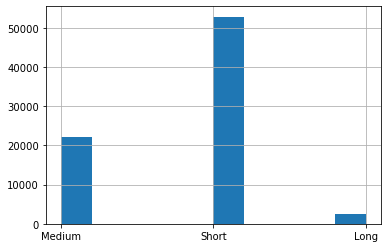

In [12]:
data_1.Duration.hist()

<b> As observed from the histogram, Our major rows fall into short duratio category with more than 50000 sightings, followed by Medium at aroung 22000 and Long at around 2500 </b>

Checking the null values

After changing into categorical we get 57 more null values for the target variable, just subsetting the dataframe on Duration column

In [13]:
data_1.isnull().sum()

Country      0
State        0
City         0
Year         0
Month        0
sh           0
Day          0
Hour         0
Duration    57
dtype: int64

In [14]:
data_1 = data_1.dropna(subset = ['Duration'])

In [17]:
data_2.isnull().sum()

Country      0
Year         0
Month        0
sh           0
Day          0
Hour         0
Duration    57
dtype: int64

In [18]:
data_2 = data_2.dropna(subset = ['Duration'])

<b> Dataset 1 </b>

In [15]:
data_1.head()

,Country,State,City,Year,Month,sh,Day,Hour,Duration
0,US,Texas,San Marcos,1949,10,cylinder,10,20,Medium
1,US,Texas,Lackland Air Force Base,1949,10,light,10,21,Medium
2,GB,England,Blacon,1955,10,circle,10,17,Short
3,US,Texas,Edna,1956,10,circle,10,21,Medium
4,US,Hawaii,Kane'ohe,1960,10,light,10,20,Medium


In [16]:
data_2 = data_2.drop(['Duration_minutes','lat','long'], axis = 1)

<b> Dataset 2 </b>

In [19]:
data_2.head()

,Country,Year,Month,sh,Day,Hour,Duration
0,US,1949,10,cylinder,10,20,Medium
1,US,1949,10,light,10,21,Medium
2,GB,1955,10,circle,10,17,Short
3,US,1956,10,circle,10,21,Medium
4,US,1960,10,light,10,20,Medium


In Dataset 1, we have four cateforical features i.e Country, State, City, Shape while in Datset 2 we have 2 categorical features i.e Country and Shape.

As per the preprocessing done in the previous notebook, Our categorical columns have following unique values

    * Country  - 10 
    * State - 796
    * City - >10000
    * Shape - 28

In few steps below we have encoded our categorical variables as to have all numerical features for Modelling

Since we have to convert aur categorical features into numerical for regressiona models, encoding for categorical features is performed below

* I have used two encoding techniques - Binary Encoding for the original dataset and Ordinal encoding for the second dataset

### 5.5.1 Encoding Categorical<a id='5.5.1_Encoding_catgorical'></a>

In [20]:
from sklearn import preprocessing
X = data_2[['Country','Year','Month','sh','Day','Hour']]
y = data_2['Duration']

X = pd.get_dummies(X)
#ce_lab = preprocessing.LabelEncoder()

#X = cenc.fit_transform(X)
#y = ce_lab.fit_transform(y)

In [21]:
X.shape

(77487, 42)

In [22]:
X_1 = data_1[['Country','Year','Month','sh','Day','Hour','State','City']]
y_1 = data_1['Duration']

ce_bin = category_encoders.BinaryEncoder(cols=['Country','sh','State','City'])

X_1 = ce_bin.fit_transform(X_1)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [23]:
X_1.shape

(77487, 41)

After using Binary encoding or original data, Because Of State and City columns which have a lot of unique values,
we have 43 columns and 77544 rows

## 5.6 Splitting Data<a id='5.6_Splitting_Data'></a>

<b> For Dataset 2 </b>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 40)

<b> For Dataset 1 </b>

In [36]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = .25, random_state = 40)

## 5.7 Training Models<a id='5.7_Training_Models'></a>

Below I have run differnet classification algorithms to find the most suitable for our dataset. Each Algortihm is followed by confusion matrix and classification report

### 5.7.1 Decision Tree Classification<a id='5.7.1_Decision_Tree_Classification'></a>

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [29]:
cm = confusion_matrix(y_test, dtree_predictions)

In [28]:
dtree_model.score(X_test, y_test)

0.6774726409250464

#### Decision Tree Confusion Matrix<a id='Decision_Tree_Confusion_Matrix'></a>

In [47]:
labels = np.unique(y_test)
a =  confusion_matrix(y_test, dtree_predictions, labels=labels)

pd.DataFrame(a, index=labels, columns=labels)

,Long,Medium,Short
Long,0,11,594
Medium,0,66,5569
Short,0,74,13058


<b> As Seen from the Confusion Matriix , Around 600 values which are long were predicted as Short where as 5500 Medium were predicted as short and 13000 were predicted correctly so around 68% were predicted correctly for short where as only 66 were oredicted correctly for Medium duration and 11 for long duration, overall Accuracy is 0.68 whcih is not bad but still predictability is not that good for medium and long</b>

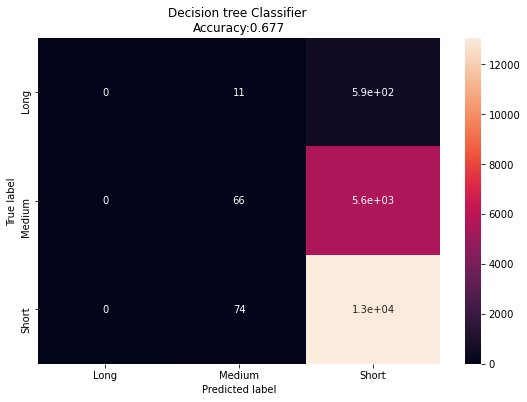

In [48]:
from sklearn.metrics import accuracy_score
cm_df = pd.DataFrame(cm,
                     index = ['Long','Medium','Short'], 
                     columns = ['Long','Medium','Short'])

plt.figure(figsize=(9,6))
sns.heatmap(cm_df, annot=True)
plt.title('Decision tree Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, dtree_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Decision Tree Classification Report<a id='Decision_Tree_Classification_Report'></a>

In [105]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

        Long       0.00      0.00      0.00       605
      Medium       0.44      0.01      0.02      5635
       Short       0.68      0.99      0.81     13132

    accuracy                           0.68     19372
   macro avg       0.37      0.34      0.28     19372
weighted avg       0.59      0.68      0.55     19372



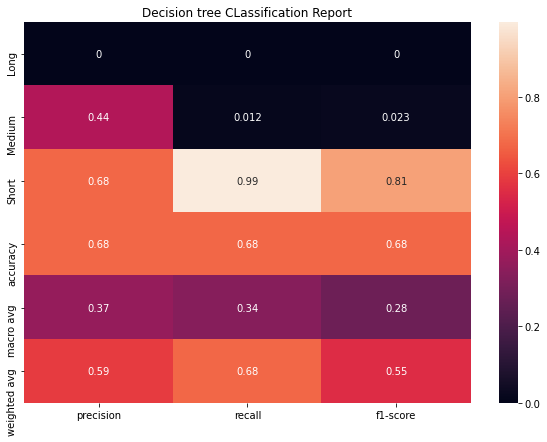

In [66]:
plt.figure(figsize=(10,7))
clf_report = classification_report(y_test, dtree_predictions,
                                   labels=labels,
                                   target_names=labels,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title('Decision tree CLassification Report')

plt.show()

<b> Data Set 2</b>

In [37]:
#from sklearn.tree import DecisionTreeClassifier
dtree_model_1 = DecisionTreeClassifier(max_depth = 3).fit(X_1_train, y_1_train)
dtree_predictions_1 = dtree_model_1.predict(X_1_test)

In [38]:
confusion_matrix(y_1_test, dtree_predictions_1)

array([[    0,     0,   605],
       [    0,     0,  5635],
       [    0,     0, 13132]], dtype=int64)

In [39]:
dtree_model_1.score(X_1_test, y_1_test)

0.6778856080941565

### 5.7.2 KNN Classification<a id='5.7.2_KNN_Classification'></a>

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

In [41]:
knn_predictions = knn.predict(X_test)

In [43]:
cm_kn = confusion_matrix(y_test, knn_predictions)

In [44]:
knn.score(X_test, y_test)

0.6305492463349164

#### KNN Confusion Matrix<a id='KNN_Confusion_Matrix'></a>

In [49]:
labels = np.unique(y_test)
b =  confusion_matrix(y_test, knn_predictions, labels=labels)

pd.DataFrame(b, index=labels, columns=labels)

,Long,Medium,Short
Long,4,104,497
Medium,10,1060,4565
Short,18,1963,11151


<b> As Seen from the Confusion Matriix , Although accuracy is bit less at 63% but it shows improvement in predicting as compared to decision tree classifier. Around 497 values which are long were predicted as Short where as 104 as Medium and 4 correctly as long. 
    
In case of medium, its improved to 1000 values being predicted correctly and 4500 as short

In Short category, although the number is bit less, around 11100 values being predicted correctly, but it still is better with other categories </b>

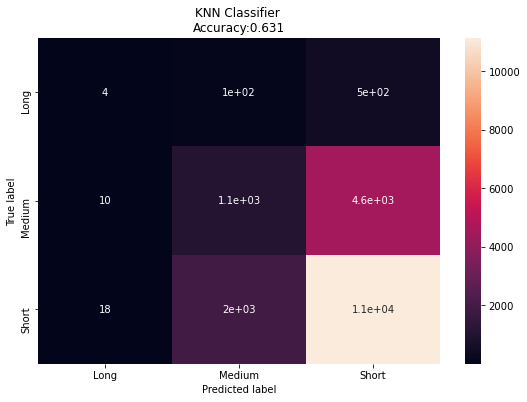

In [46]:
cm_kdf = pd.DataFrame(cm_kn,
                     index = ['Long','Medium','Short'], 
                     columns = ['Long','Medium','Short'])

plt.figure(figsize=(9,6))
sns.heatmap(cm_kdf, annot=True)
plt.title('KNN Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, knn_predictions)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### KNN Classification Report<a id='KNN_Classification_Report'></a>

In [104]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

        Long       0.12      0.01      0.01       605
      Medium       0.34      0.19      0.24      5635
       Short       0.69      0.85      0.76     13132

    accuracy                           0.63     19372
   macro avg       0.38      0.35      0.34     19372
weighted avg       0.57      0.63      0.59     19372



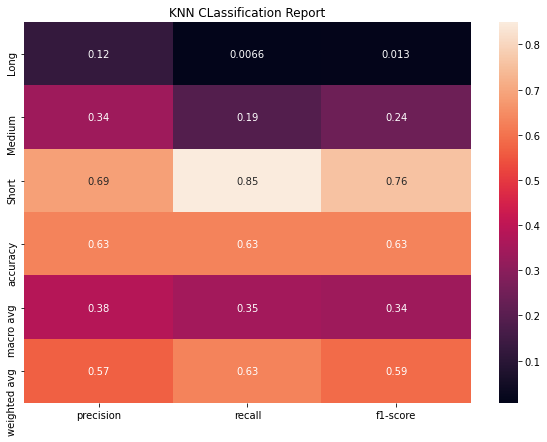

In [67]:
plt.figure(figsize=(10,7))
clf_report_1 = classification_report(y_test, knn_predictions,
                                   labels=labels,
                                   target_names=labels,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_1).iloc[:-1, :].T, annot=True)
plt.title('KNN CLassification Report')

plt.show()

### 5.7.3 Naive Baiyes Classification<a id='5.7.3_Naive_Baiyes_Classification'></a>

In [68]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb_pred = gnb.fit(X_train, y_train).predict(X_test)


In [69]:
cm_NB = confusion_matrix(y_test, nb_pred)

In [70]:
gnb.score(X_test, y_test)

0.14448688829238077

#### Naive Bayes Confusion Matrix<a id='Naive_Bayes_Confusion_Matrix'></a>

In [71]:
labels = np.unique(y_test)
c =  confusion_matrix(y_test, nb_pred, labels=labels)

pd.DataFrame(c, index=labels, columns=labels)

,Long,Medium,Short
Long,528,45,32
Medium,4574,553,508
Short,10009,1405,1718


<b> As Seen from the Confusion Matrix , this is pretty worse when it comes to accuracy just .14 and its reveres of previous models, For long this is predicting 528 correct vales out of 605 values but for other classes the prediction is pretty poor 
    
   * 4500 medium incorrectly as long and 508 medium as short
    
   * 10000 short values incorrectly as long and 1400 short as medium while the correct predicting for short is very less compared to previous models i.e. only 1700 values
    
This model seems unsuitable for our data </b>

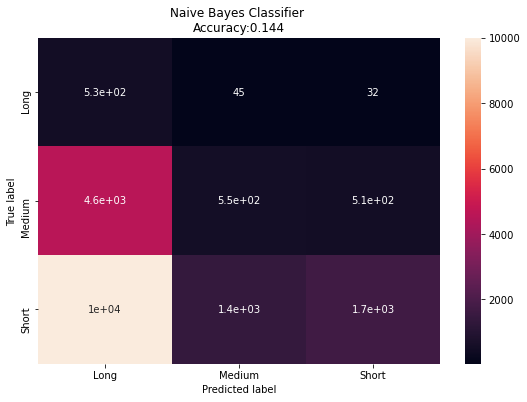

In [72]:
cm_nbdf = pd.DataFrame(cm_NB,
                     index = ['Long','Medium','Short'], 
                     columns = ['Long','Medium','Short'])

plt.figure(figsize=(9,6))
sns.heatmap(cm_nbdf, annot=True)
plt.title('Naive Bayes Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, nb_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Naive Bayes Classification Report<a id='Naive_Bayes_Classification_Report'></a>

In [103]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

        Long       0.03      0.87      0.07       605
      Medium       0.28      0.10      0.14      5635
       Short       0.76      0.13      0.22     13132

    accuracy                           0.14     19372
   macro avg       0.36      0.37      0.15     19372
weighted avg       0.60      0.14      0.20     19372



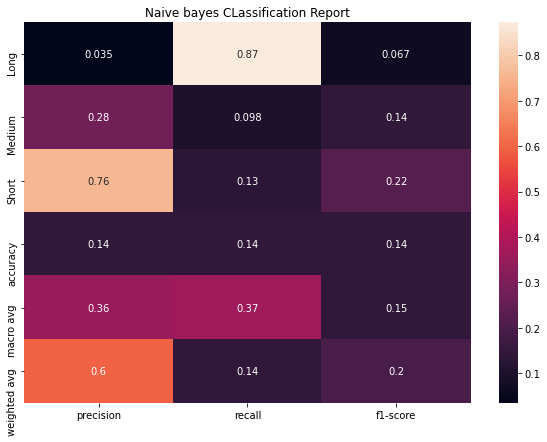

In [73]:
plt.figure(figsize=(10,7))
clf_report_2 = classification_report(y_test, nb_pred,
                                   labels=labels,
                                   target_names=labels,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_2).iloc[:-1, :].T, annot=True)
plt.title('Naive bayes CLassification Report')

plt.show()

### 5.7.4 Random Forest Classification<a id='5.7.4_Random_Forest_Classification'></a>

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_pred = rf.fit(X_train, y_train).predict(X_test)

In [75]:
cm_rf = confusion_matrix(y_test, rf_pred) 

In [76]:
rf.score(X_test, y_test)

0.6409766673549453

#### Random Forest Confusion Matrix<a id='Random_Forest_Confusion_Matrix'></a>

In [77]:
labels = np.unique(y_test)
d =  confusion_matrix(y_test, rf_pred, labels=labels)

pd.DataFrame(d, index=labels, columns=labels)

,Long,Medium,Short
Long,7,107,491
Medium,47,1006,4582
Short,59,1669,11404


<b> As Seen from the Confusion Matriix , with accuracy of .641 another tree based algorithm seems to be performing same as decision tree but with little improvement with correct values being predicted for Long, Medium and Short are 7, 1006 and 11400 respectively. which is acceptable</b>

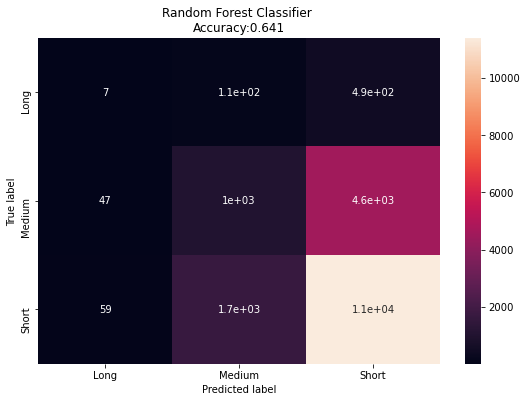

In [78]:
cm_rfdf = pd.DataFrame(cm_rf,
                       index = ['Long','Medium','Short'], 
                     columns = ['Long','Medium','Short'])

plt.figure(figsize=(9,6))
sns.heatmap(cm_rfdf, annot=True)
plt.title('Random Forest Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, rf_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Random Forest Classification Report<a id='Random_Forest_Classification_Report'></a>

In [102]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

        Long       0.06      0.01      0.02       605
      Medium       0.36      0.18      0.24      5635
       Short       0.69      0.87      0.77     13132

    accuracy                           0.64     19372
   macro avg       0.37      0.35      0.34     19372
weighted avg       0.58      0.64      0.59     19372



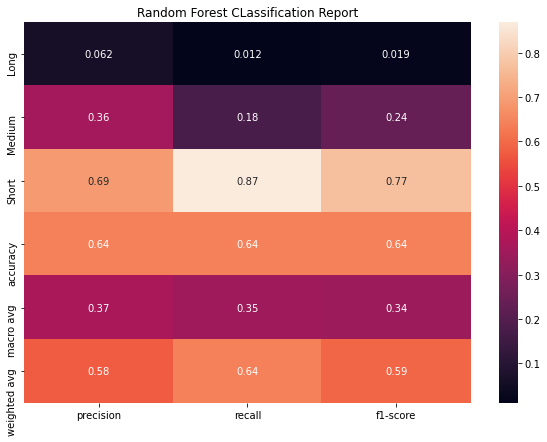

In [79]:
plt.figure(figsize=(10,7))
clf_report_3 = classification_report(y_test, rf_pred,
                                   labels=labels,
                                   target_names=labels,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_3).iloc[:-1, :].T, annot=True)
plt.title('Random Forest CLassification Report')

plt.show()

### 5.7.5 SVC Classification<a id='5.7.5_SVC_Classification'></a>

In [83]:
from sklearn.svm import SVC

model_SV = SVC(decision_function_shape='ovo')
# fit model
model_SV.fit(X_train, y_train)
# make predictions
sv_pred = model_SV.predict(X_test)

In [81]:
model_SV.score(X_test, y_test)

0.6778856080941565

In [84]:
cm_SV = confusion_matrix(y_test, sv_pred)

#### SVC Confusion Matrix<a id='SVC_Confusion_Matrix'></a>

In [85]:
labels = np.unique(y_test)
e =  confusion_matrix(y_test, sv_pred, labels=labels)

pd.DataFrame(e, index=labels, columns=labels)

,Long,Medium,Short
Long,0,0,605
Medium,0,0,5635
Short,0,0,13132


<b> Here i have used SVC for multiple classes using One over One cllassification method , as per confusion matrix, its only predcting values as sort there is no prediction for medium and large, So although  accuracy is better bur again prediction is poor/b>

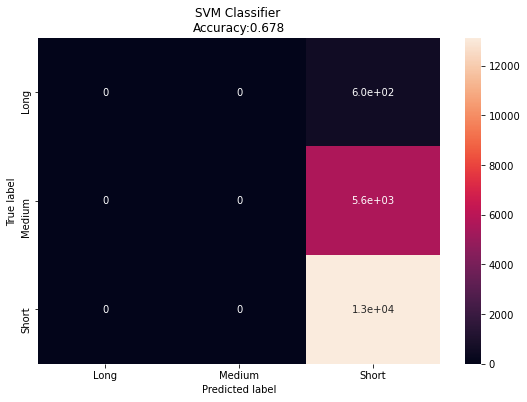

In [86]:
cm_svdf = pd.DataFrame(cm_SV,
                       index = ['Long','Medium','Short'], 
                     columns = ['Long','Medium','Short'])

plt.figure(figsize=(9,6))
sns.heatmap(cm_svdf, annot=True)
plt.title('SVM Classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, sv_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### SVC Classification Report<a id='SVC_Classification_Report'></a>

In [101]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

        Long       0.00      0.00      0.00       605
      Medium       0.00      0.00      0.00      5635
       Short       0.68      1.00      0.81     13132

    accuracy                           0.68     19372
   macro avg       0.23      0.33      0.27     19372
weighted avg       0.46      0.68      0.55     19372



D:\Anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


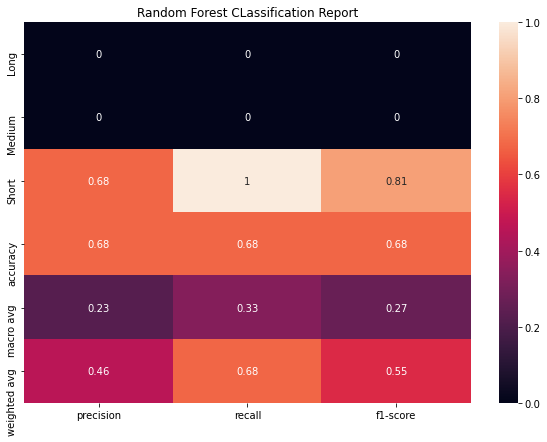

In [87]:
plt.figure(figsize=(10,7))
clf_report_4 = classification_report(y_test, sv_pred,
                                   labels=labels,
                                   target_names=labels,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_4).iloc[:-1, :].T, annot=True)
plt.title('Random Forest CLassification Report')

plt.show()

### 5.7.6 Metrics Summary<a id='5.7.6_Metrics_Summary'></a>

| Class | Support | F1 Score | Precision | Recall |
| :-: | :-: | :-: | :-: | :-: | 
| <b>SVC Classifier</b> | Accuracy | 0.68 |
| Short | 13132 | 0.81 | 0.68 | 1.0 |
| Medium | 5635 | 0 | 0 | 0 |
| Long | 605 | 0 | 0 | 0 |
| <b>Decision Tree Classifier</b> | Accuracy | 0.68 |
| Short | 13132 | 0.81 | 0.68 | 0.99 |
| Medium | 5635 | 0.023 | 0.44 | 0.012 |
| Long | 605 | 0 | 0 | 0 |
| <b>KNN Classifier</b> | Accuracy | 0.63 |
| Short | 13132 | 0.76 | 0.69 | 0.85 |
| Medium | 5635 | 0.24 | 0.34 | 0.19 |
| Long | 605 | 0.01 | 0.12 | 0.01 |
| <b>Naives Bayes Classifier</b> | Accuracy | 0.14 |
| Short | 13132 | 0.22 | 0.76 | 0.13 |
| Medium | 5635 | 0.14 | 0.28 | 0.10 |
| Long | 605 | 0.07 | 0.03 | 0.87 |
| <b>Random Forest Classifier</b> | Accuracy | 0.64 |
| Short | 13132 | 0.77 | 0.69 | 0.87 |
| Medium | 5635 | 0.24 | 0.36 | 0.18 |
| Long | 605 | 0.02 | 0.06 | 0.01 |


<b> As Seen from the Comparison Chart for various Models
    
    * Although SVC is higher in accuracy but, its orediction for medium and Long duration is 0, so it doesn't look suitable
    
    * In my opinion, KNN and Random Forest seem to be much better models for our data, although accuracy is aroun 0.64 for both but their prediction is better than other models
    
 Lets try to tune some hyper Paramters below to see if we can improve on our models</b>

## 5.8 Parameter Tuning<a id='5.8_Parameter_Tuning'></a>

<b> Using GridSearchCV and various Clasification techniques to find the best parameters and model to see if we can fine tune our parmaters and improve our model. We will use accuracy for evaluating best score and parmeters </b>

### 5.8.1 KNN Using Cross Validation<a id='5.8.1_KNN_Using_Cross_Validation'></a>

In [93]:
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


[0.60627178 0.61324042 0.62575816 0.61053039 0.62808104 0.60704607
 0.61336947 0.60454311 0.59305627 0.61448116]


In [94]:
print(scores.mean())

0.6116377865600324


### 5.8.2 KNN Using GridSearchCV<a id='5.8.2_KNN_Using_GridSearchCV'></a>

In [95]:
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [96]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [97]:
print ("Best Score: {}".format(grid.best_score_))
print ("Best params: {}".format(grid.best_params_))

Best Score: 0.6564064905405551
Best params: {'n_neighbors': 20}


In [121]:
KN = KNeighborsClassifier(n_neighbors = 20)

KN.fit(X_train, y_train)

y_kn = KN.predict(X_test)



In [122]:
labels = np.unique(y_test)
g =  confusion_matrix(y_test, y_kn, labels=labels)

pd.DataFrame(g, index=labels, columns=labels)

,Long,Medium,Short
Long,0,46,559
Medium,0,497,5138
Short,0,732,12400


### 5.8.3 Decision Tree Using GridSearchCV<a id='5.8.3_Decision_Tree_Using_GridSearchCV'></a>

In [98]:
parameter_grid = {'max_depth': [3, 4, 5,6,7,8,9,10,15,20],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X, y)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.6817788702630738
Best params: {'criterion': 'entropy', 'max_depth': 3}


In [89]:
model_f = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy').fit(X_train, y_train)
y_pre = model_f.predict(X_test)

<b> CONFUSION MATRIX </b>

In [90]:
labels = np.unique(y_test)
f =  confusion_matrix(y_test, y_pre, labels=labels)

pd.DataFrame(f, index=labels, columns=labels)

,Long,Medium,Short
Long,0,4,601
Medium,0,14,5621
Short,0,8,13124


In [113]:
print(classification_report(y_test, y_pre))

D:\Anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Long       0.00      0.00      0.00       605
      Medium       0.54      0.00      0.00      5635
       Short       0.68      1.00      0.81     13132

    accuracy                           0.68     19372
   macro avg       0.41      0.33      0.27     19372
weighted avg       0.62      0.68      0.55     19372



### 5.8.4 Random Forest Using GridSearchCV<a id='5.8.4_Random_Forest_Using_GridSearchCV'></a>

In [107]:
parame_grid = {
    'n_estimators': [100, 200, 300, 400 ,500],
    'max_features': [3, 4, 5],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()

gs_rf = GridSearchCV(rf, param_grid = parame_grid,
                          cv =5)

gs_rf.fit(X, y)

print ("Best Score: {}".format(gs_rf.best_score_))
print ("Best params: {}".format(gs_rf.best_params_))


Best Score: 0.6169804024112568
Best params: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 500}


In [118]:
RFC = RandomForestClassifier(criterion = 'gini', max_features = 3, n_estimators = 500)

RFC.fit(X_train, y_train)

y_rfc = RFC.predict(X_test)



In [120]:
RFC.score(X_test, y_test)

0.6383956225480074

In [119]:
labels = np.unique(y_test)
e =  confusion_matrix(y_test, y_rfc, labels=labels)

pd.DataFrame(e, index=labels, columns=labels)

,Long,Medium,Short
Long,8,102,495
Medium,43,938,4654
Short,64,1647,11421


### 5.8.5 Multinomial NB Using GridSearchCV<a id='5.8.5_Multinomial_NB_Using_GridSearchCV'></a>

In [109]:
from sklearn.naive_bayes import MultinomialNB

Param_grid = {
    'alpha': [0.01, 0.1, 1.0]
}

mnb = MultinomialNB()

gs_mnb = GridSearchCV(mnb, param_grid = Param_grid,
                          cv =5)

gs_mnb.fit(X, y)

print ("Best Score: {}".format(gs_mnb.best_score_))
print ("Best params: {}".format(gs_mnb.best_params_))


Best Score: 0.681146518078135
Best params: {'alpha': 0.1}


In [110]:
MNB = MultinomialNB(alpha = 0.1)

MNB.fit(X_train, y_train)

y_mnb = MNB.predict(X_test)



In [111]:
labels = np.unique(y_test)
f =  confusion_matrix(y_test, y_mnb, labels=labels)

pd.DataFrame(f, index=labels, columns=labels)

,Long,Medium,Short
Long,6,7,592
Medium,22,39,5574
Short,22,26,13084


<b> CONFUSION MATRIX </b>

In [112]:
print(classification_report(y_test, y_mnb))

              precision    recall  f1-score   support

        Long       0.12      0.01      0.02       605
      Medium       0.54      0.01      0.01      5635
       Short       0.68      1.00      0.81     13132

    accuracy                           0.68     19372
   macro avg       0.45      0.34      0.28     19372
weighted avg       0.62      0.68      0.55     19372



### 5.8.6 Summary After Parameter Tuning<a id='5.8.6_Summary_After_Parameter_Tuning'></a>


* <b> Model - Decision Tree </b>

    * Best Criterion - Entropy
    * Max Depth = 3 

    * Score = 0.682

* <b> Model - KNN </b>

    * Best Neighbors - 20 

    * Score = 0.656

* <b> Model - Random Forest </b>

    * Best Criterion - Gini
    * Max features = 3 
    * Best n_Estimators = 500

    * Score = 0.616

* <b> Model - Multinomial NB </b>

    * Best Alpha = 0.1

    * Score = 0.681



<b> Final Conclusion after tuning Parameters
    
    * In my opinion Random Forest seems to be the best model after tuning paramters, althouh the accuracy is less at 0.62 
    but its prediction is much better than other models when using the best paramters
    
    
    * Although Multinomial Nb is the best in accuracy but its correct prediction for medium and Long is very less
 